In [8]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=d206179e8ece4e0267d76ad08f7229c21f4d09871c0ebab895795290874061e8
  Stored in directory: c:\users\arhio\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [9]:
!pip install lightgbm

In [10]:
!pip install xgboost

In [40]:
!pip install pyarrow

In [46]:
!pip install multiprocess

In [122]:
!pip install Image

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

import dask.dataframe as dd
from dask.delayed import delayed
from dask.distributed import Client

import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from scipy import stats

In [3]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


In [4]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as lgbm
import xgboost as xgb

<h2>Обработка данных</h2>

In [6]:
train = pd.read_csv("Data/data_train.csv", index_col=0)
test = pd.read_csv("Data/data_test.csv", index_col=0)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831653 entries, 0 to 831652
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        831653 non-null  int64  
 1   vas_id    831653 non-null  float64
 2   buy_time  831653 non-null  int64  
 3   target    831653 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 31.7 MB


In [8]:
train

,id,vas_id,buy_time,target
0,540968,8.0,1537131600,0.0
1,1454121,4.0,1531688400,0.0
2,2458816,1.0,1534107600,0.0
3,3535012,5.0,1535922000,0.0
4,1693214,1.0,1535922000,0.0
...,...,...,...,...
831648,3812226,2.0,1546203600,0.0
831649,2480469,2.0,1546203600,0.0
831650,158236,2.0,1546203600,0.0
831651,1825525,2.0,1546203600,0.0


In [9]:
test

,id,vas_id,buy_time
0,3130519,2.0,1548018000
1,2000860,4.0,1548018000
2,1099444,2.0,1546808400
3,1343255,5.0,1547413200
4,1277040,2.0,1546808400
...,...,...,...
71226,2502453,5.0,1548018000
71227,1693213,2.0,1548018000
71228,1891350,2.0,1548018000
71229,2437172,2.0,1548018000


In [8]:
client = Client(n_workers=2, threads_per_worker=2, memory_limit='8GB')
client

Client Scheduler: tcp://127.0.0.1:58797 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 14.90 GiB


In [4]:
dd.read_csv?

In [5]:
data_types = { 'id':'str', 'buy_time':'str', '0':'str','1':'str','2':'str','3':'str','4':'str','5':'str','6':'str','7':'str','8':'str','9':'str','10':'str','11':'str','12':'str','13':'str','14':'str','15':'str','16':'str','17':'str','18':'str','19':'str','20':'str','21':'str','22':'str','23':'str','24':'str','25':'str','26':'str','27':'str','28':'str','29':'str','30':'str','31':'str','32':'str','33':'str','34':'str','35':'str','36':'str','37':'str','38':'str','39':'str','40':'str','41':'str','42':'str','43':'str','44':'str','45':'str','46':'str','47':'str','48':'str','49':'str','50':'str','51':'str','52':'str','53':'str','54':'str','55':'str','56':'str','57':'str','58':'str','59':'str','60':'str','61':'str','62':'str','63':'str','64':'str','65':'str','66':'str','67':'str','68':'str','69':'str','70':'str','71':'str','72':'str','73':'str','74':'str','75':'str','76':'str','77':'str','78':'str','79':'str','80':'str','81':'str','82':'str','83':'str','84':'str','85':'str','86':'str','87':'str','88':'str','89':'str','90':'str','91':'str','92':'str','93':'str','94':'str','95':'str','96':'str','97':'str','98':'str','99':'str','100':'str','101':'str','102':'str','103':'str','104':'str','105':'str','106':'str','107':'str','108':'str','109':'str','110':'str','111':'str','112':'str','113':'str','114':'str','115':'str','116':'str','117':'str','118':'str','119':'str','120':'str','121':'str','122':'str','123':'str','124':'str','125':'str','126':'str','127':'str','128':'str','129':'str','130':'str','131':'str','132':'str','133':'str','134':'str','135':'str','136':'str','137':'str','138':'str','139':'str','140':'str','141':'str','142':'str','143':'str','144':'str','145':'str','146':'str','147':'str','148':'str','149':'str','150':'str','151':'str','152':'str','153':'str','154':'str','155':'str','156':'str','157':'str','158':'str','159':'str','160':'str','161':'str','162':'str','163':'str','164':'str','165':'str','166':'str','167':'str','168':'str','169':'str','170':'str','171':'str','172':'str','173':'str','174':'str','175':'str','176':'str','177':'str','178':'str','179':'str','180':'str','181':'str','182':'str','183':'str','184':'str','185':'str','186':'str','187':'str','188':'str','189':'str','190':'str','191':'str','192':'str','193':'str','194':'str','195':'str','196':'str','197':'str','198':'str','199':'str','200':'str','201':'str','202':'str','203':'str','204':'str','205':'str','206':'str','207':'str','208':'str','209':'str','210':'str','211':'str','212':'str','213':'str','214':'str','215':'str','216':'str','217':'str','218':'str','219':'str','220':'str','221':'str','222':'str','223':'str','224':'str','225':'str','226':'str','227':'str','228':'str','229':'str','230':'str','231':'str','232':'str','233':'str','234':'str','235':'str','236':'str','237':'str','238':'str','239':'str','240':'str','241':'str','242':'str','243':'str','244':'str','245':'str','246':'str','247':'str','248':'str','249':'str','250':'str','251':'str','252':'str' }
data = dd.read_csv("Data/features.csv", blocksize=50e6, storage_options={'anon': True}, dtype = data_types, lineterminator=['\t','\n'])#250MB

In [6]:
data.to_parquet("Data/features.parquet")

In [4]:
data = dd.read_parquet("Data/features.parquet")

In [5]:
data

,\tid\tbuy_time\t0\t1\t2\t3\t4\t5\t6\t7\t8\t9\t10\t11\t12\t13\t14\t15\t16\t17\t18\t19\t20\t21\t22\t23\t24\t25\t26\t27\t28\t29\t30\t31\t32\t33\t34\t35\t36\t37\t38\t39\t40\t41\t42\t43\t44\t45\t46\t47\t48\t49\t50\t51\t52\t53\t54\t55\t56\t57\t58\t59\t60\t61\t62\t63\t64\t65\t66\t67\t68\t69\t70\t71\t72\t73\t74\t75\t76\t77\t78\t79\t80\t81\t82\t83\t84\t85\t86\t87\t88\t89\t90\t91\t92\t93\t94\t95\t96\t97\t98\t99\t100\t101\t102\t103\t104\t105\t106\t107\t108\t109\t110\t111\t112\t113\t114\t115\t116\t117\t118\t119\t120\t121\t122\t123\t124\t125\t126\t127\t128\t129\t130\t131\t132\t133\t134\t135\t136\t137\t138\t139\t140\t141\t142\t143\t144\t145\t146\t147\t148\t149\t150\t151\t152\t153\t154\t155\t156\t157\t158\t159\t160\t161\t162\t163\t164\t165\t166\t167\t168\t169\t170\t171\t172\t173\t174\t175\t176\t177\t178\t179\t180\t181\t182\t183\t184\t185\t186\t187\t188\t189\t190\t191\t192\t193\t194\t195\t196\t197\t198\t199\t200\t201\t202\t203\t204\t205\t206\t207\t208\t209\t210\t211\t212\t213\t214\t215\t216\t217\t218\t219\t220\t221\t222\t223\t224\t225\t226\t227\t228\t229\t230\t231\t232\t233\t234\t235\t236\t237\t238\t239\t240\t241\t242\t243\t244\t245\t246\t247\t248\t249\t250\t251\t252
npartitions=451,
,object
,...
...,...
,...
,...


In [6]:
columns = [e for e in list(data.columns)[0].split('\t') if e != '']
data = data.rename(columns={list(data.columns)[0]: "row"})
txt = data.row.str.split('\t')
for p, column in enumerate(columns):
    data[column] = txt.str[p]
data = data.drop('row', axis=1)

In [7]:
data.to_parquet("Data/features2.parquet")

In [8]:
data = dd.read_parquet("Data/features2.parquet")

In [17]:
for column in data.columns:
    if column in ('id', 'buy_time', '0'):
        data[column] = data[column].astype('int32')
    else:
        data[column] = data[column].astype('float')

In [ ]:
data.to_parquet("Data/features3.parquet")

In [9]:
data = dd.read_parquet("Data/features3.parquet")

In [10]:
lst_col = data.columns
count = len(lst_col)
lst = ["idx"]
for pos, val in enumerate(lst_col):
    if pos < count - 1:        
        lst.append(val)

data = data.rename(columns=dict(zip(data.columns, lst)))

data.columns

Index(['idx', 'id', 'buy_time', '0', '1', '2', '3', '4', '5', '6',
       ...
       '242', '243', '244', '245', '246', '247', '248', '249', '250', '251'],
      dtype='object', length=255)

In [11]:
#import sys 
#sys.setrecursionlimit(30000000)

In [12]:
data = data.drop('idx', axis=1)

In [13]:
data.head(20)

,id,buy_time,0,1,2,3,4,5,6,7,...,242,243,244,245,246,247,248,249,250,251
0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,...,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614
1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,...,-5.295406,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614
2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,25.183903,...,-17.295406,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614
3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,-65.076097,...,-17.295406,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614
4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,-65.076097,...,105.704594,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386
5,2028410,1534107600,-96.799971,-26.819112,-110.740786,-79.426798,-116.158246,-100.53179,-16.08618,-65.076097,...,-17.295406,-11.373846,346.229208,-17.996269,127.369552,-159.747724,-17.832889,-0.694428,-4.175933,-0.45614
6,2030773,1544994000,284.560029,-26.819112,280.779214,-62.486798,275.361754,-83.59179,-16.08618,-65.076097,...,-17.295406,-854.373846,-552.770792,-20.996269,-37.630448,-63.747724,-25.832889,-0.694428,-12.175933,-0.45614
7,2032337,1537736400,92.550029,-140.459112,95.559214,-129.516798,90.141754,-150.62179,119.51382,70.523903,...,-17.295406,-568.373846,-207.770792,-23.996269,-37.630448,-36.747724,43.167111,35.305572,20.824067,-0.45614
8,2033486,1545598800,-93.749971,-123.939112,-77.190786,-82.536798,-82.608246,-103.64179,-16.08618,-65.076097,...,-17.295406,-962.373846,-598.770792,-25.996269,-37.630448,-202.747724,31.167111,-0.694428,-12.175933,-0.45614
9,2034066,1544389200,228.520029,316.910888,233.709214,350.323202,228.291754,329.21821,-16.08618,-65.076097,...,-17.295406,-969.373846,-613.770792,-24.996269,-37.630448,-250.747724,-22.832889,-0.694428,-11.175933,0.54386


In [14]:
for column in data.columns:
    if column in ('id', 'buy_time'):
        data[column] = data[column].astype('int64')
    else:
        data[column] = data[column].astype('float')

In [15]:
data.to_parquet("Data/features4.parquet")


In [8]:
data = dd.read_parquet("Data/features4.parquet")

<h2>Добавление фичей</h2>

In [9]:
def GetDateTime(df):
    df['hours'] = df['buy_time'].dt.hour
    df['days'] = df['buy_time'].dt.day
    df['day_week'] = df['buy_time'].dt.dayofweek
    df['day_year'] = df['buy_time'].dt.dayofyear
    df['day_month'] = df['buy_time'].dt.daysinmonth
    df['weeks_on'] = df['buy_time'].dt.week
    df['week_year'] = df['buy_time'].dt.weekofyear
    df['months'] = df['buy_time'].dt.month
    df['quartal'] = df['buy_time'].dt.quarter
    df['years'] = df['buy_time'].dt.year
    return df

In [10]:
train = data.merge(train, left_on='id', right_on='id').compute()
train

,id,buy_time_x,0,1,2,3,4,5,6,7,...,245,246,247,248,249,250,251,vas_id,buy_time_y,target
0,2046132,1534712400,300.820029,1599.480888,286.879214,1585.013202,281.461754,1563.90821,-16.08618,654.013903,...,-25.996269,-35.630448,-295.747724,-17.832889,-0.694428,-4.175933,-0.45614,2.0,1544389200,0.0
1,2050810,1540760400,-86.209971,91.820888,-84.480786,110.333202,-89.898246,89.22821,-16.08618,-65.076097,...,-23.996269,190.369552,-286.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,1536526800,0.0
2,2070757,1540760400,-96.799971,-408.179112,-110.740786,-460.786798,-114.038246,-479.77179,-16.08618,-65.076097,...,-21.996269,-37.630448,-151.747724,-24.832889,0.305572,-12.175933,-0.45614,1.0,1532293200,0.0
3,2071522,1544994000,-94.939971,-363.699112,-108.880786,-411.226798,-114.298246,-432.33179,-16.08618,-65.076097,...,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,1535317200,0.0
4,2075318,1533502800,-75.639971,669.690888,-89.580786,732.343202,-94.998246,736.65821,-16.08618,782.383903,...,-25.996269,-37.630448,-167.747724,-14.832889,2.305572,-4.175933,-0.45614,2.0,1544389200,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,3513825,1546808400,-9.299971,-231.429112,26.779214,-183.566798,21.361754,-204.67179,-16.08618,-65.076097,...,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,1533502800,0.0
980,3513869,1548018000,82.370029,-123.429112,155.939214,-88.526798,150.521754,-109.63179,-16.08618,-65.076097,...,-23.996269,-37.630448,-271.747724,-22.832889,-0.694428,-12.175933,-0.45614,1.0,1532293200,0.0
981,3517434,1548018000,-96.799971,-284.349112,-100.740786,-274.796798,-106.158246,-295.90179,-16.08618,-65.076097,...,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,2.0,1545598800,0.0
982,3519714,1546808400,167.280029,110.140888,153.339214,57.533202,147.921754,36.42821,-2.00618,-50.996097,...,-14.996269,7.369552,-180.747724,-19.832889,0.305572,-12.175933,-0.45614,2.0,1545598800,0.0


In [11]:
train = train.drop('buy_time_y', axis=1)
train = train.rename(columns={"buy_time_x":"buy_time"})
train

,id,buy_time,0,1,2,3,4,5,6,7,...,244,245,246,247,248,249,250,251,vas_id,target
0,2046132,1534712400,300.820029,1599.480888,286.879214,1585.013202,281.461754,1563.90821,-16.08618,654.013903,...,-613.770792,-25.996269,-35.630448,-295.747724,-17.832889,-0.694428,-4.175933,-0.45614,2.0,0.0
1,2050810,1540760400,-86.209971,91.820888,-84.480786,110.333202,-89.898246,89.22821,-16.08618,-65.076097,...,-613.770792,-23.996269,190.369552,-286.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,0.0
2,2070757,1540760400,-96.799971,-408.179112,-110.740786,-460.786798,-114.038246,-479.77179,-16.08618,-65.076097,...,-561.770792,-21.996269,-37.630448,-151.747724,-24.832889,0.305572,-12.175933,-0.45614,1.0,0.0
3,2071522,1544994000,-94.939971,-363.699112,-108.880786,-411.226798,-114.298246,-432.33179,-16.08618,-65.076097,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,0.0
4,2075318,1533502800,-75.639971,669.690888,-89.580786,732.343202,-94.998246,736.65821,-16.08618,782.383903,...,-242.770792,-25.996269,-37.630448,-167.747724,-14.832889,2.305572,-4.175933,-0.45614,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,3513825,1546808400,-9.299971,-231.429112,26.779214,-183.566798,21.361754,-204.67179,-16.08618,-65.076097,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,0.0
980,3513869,1548018000,82.370029,-123.429112,155.939214,-88.526798,150.521754,-109.63179,-16.08618,-65.076097,...,-570.770792,-23.996269,-37.630448,-271.747724,-22.832889,-0.694428,-12.175933,-0.45614,1.0,0.0
981,3517434,1548018000,-96.799971,-284.349112,-100.740786,-274.796798,-106.158246,-295.90179,-16.08618,-65.076097,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,2.0,0.0
982,3519714,1546808400,167.280029,110.140888,153.339214,57.533202,147.921754,36.42821,-2.00618,-50.996097,...,-613.770792,-14.996269,7.369552,-180.747724,-19.832889,0.305572,-12.175933,-0.45614,2.0,0.0


In [12]:
import datetime as dt

In [13]:
from datetime import datetime, date, time
train['buy_time'] = pd.to_datetime(train['buy_time'], unit='s')

In [14]:
train = GetDateTime(train)
train

,id,buy_time,0,1,2,3,4,5,6,7,...,hours,days,day_week,day_year,day_month,weeks_on,week_year,months,quartal,years
0,2046132,2018-08-19 21:00:00,300.820029,1599.480888,286.879214,1585.013202,281.461754,1563.90821,-16.08618,654.013903,...,21,19,6,231,31,33,33,8,3,2018
1,2050810,2018-10-28 21:00:00,-86.209971,91.820888,-84.480786,110.333202,-89.898246,89.22821,-16.08618,-65.076097,...,21,28,6,301,31,43,43,10,4,2018
2,2070757,2018-10-28 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-114.038246,-479.77179,-16.08618,-65.076097,...,21,28,6,301,31,43,43,10,4,2018
3,2071522,2018-12-16 21:00:00,-94.939971,-363.699112,-108.880786,-411.226798,-114.298246,-432.33179,-16.08618,-65.076097,...,21,16,6,350,31,50,50,12,4,2018
4,2075318,2018-08-05 21:00:00,-75.639971,669.690888,-89.580786,732.343202,-94.998246,736.65821,-16.08618,782.383903,...,21,5,6,217,31,31,31,8,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,3513825,2019-01-06 21:00:00,-9.299971,-231.429112,26.779214,-183.566798,21.361754,-204.67179,-16.08618,-65.076097,...,21,6,6,6,31,1,1,1,1,2019
980,3513869,2019-01-20 21:00:00,82.370029,-123.429112,155.939214,-88.526798,150.521754,-109.63179,-16.08618,-65.076097,...,21,20,6,20,31,3,3,1,1,2019
981,3517434,2019-01-20 21:00:00,-96.799971,-284.349112,-100.740786,-274.796798,-106.158246,-295.90179,-16.08618,-65.076097,...,21,20,6,20,31,3,3,1,1,2019
982,3519714,2019-01-06 21:00:00,167.280029,110.140888,153.339214,57.533202,147.921754,36.42821,-2.00618,-50.996097,...,21,6,6,6,31,1,1,1,1,2019


In [15]:
train = train.sort_values(by=['buy_time'], ascending=False)

In [16]:
'vas_id' in train.columns

True

In [17]:
test = data.merge(test, left_on='id', right_on='id').compute()
test = test.drop('buy_time_y', axis=1)
test = test.rename(columns={"buy_time_x":"buy_time"})
test['buy_time'] = pd.to_datetime(test['buy_time'], unit='s')
test = test.sort_values(by=['buy_time'], ascending=False)
test = GetDateTime(test)
test

,id,buy_time,0,1,2,3,4,5,6,7,...,hours,days,day_week,day_year,day_month,weeks_on,week_year,months,quartal,years
118,4333389,2019-01-20 21:00:00,-88.549971,46.650888,-102.490786,25.713202,-107.908246,4.60821,-16.08618,-59.246097,...,21,20,6,20,31,3,3,1,1,2019
135,3517419,2019-01-20 21:00:00,-96.799971,-399.929112,-110.740786,-452.536798,-116.158246,-473.64179,-16.08618,-56.826097,...,21,20,6,20,31,3,3,1,1,2019
54,4324792,2019-01-20 21:00:00,101.510029,300.660888,105.209214,326.273202,99.791754,305.16821,-16.08618,-65.076097,...,21,20,6,20,31,3,3,1,1,2019
17,3066139,2019-01-20 21:00:00,-96.799971,137.650888,-76.570786,292.553202,-81.988246,276.44821,-16.08618,-65.076097,...,21,20,6,20,31,3,3,1,1,2019
115,3368452,2019-01-20 21:00:00,236.530029,258.480888,251.759214,235.043202,246.341754,213.93821,-16.08618,-65.076097,...,21,20,6,20,31,3,3,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,222505,2018-07-08 21:00:00,-94.009971,-107.539112,-107.950786,-151.666798,-113.368246,28.20821,-16.08618,-13.476097,...,21,8,6,189,31,27,27,7,3,2018
81,2554654,2018-07-08 21:00:00,-96.799971,57.920888,-110.740786,5.313202,-116.158246,-15.79179,-16.08618,-65.076097,...,21,8,6,189,31,27,27,7,3,2018
107,2068659,2018-07-08 21:00:00,-46.369971,434.610888,-27.760786,611.723202,-33.178246,590.61821,-10.15618,203.563903,...,21,8,6,189,31,27,27,7,3,2018
83,2566056,2018-07-08 21:00:00,-96.799971,-35.299112,-97.180786,-70.106798,-102.598246,-91.21179,-16.08618,-65.076097,...,21,8,6,189,31,27,27,7,3,2018


In [18]:
'vas_id' in test.columns

True

In [19]:
%%time
def GetDataInfo(df):
    lst_param_columns_train = []
    for col in df.columns:  
        print(col)
        if 'obj' not in str(df[col].dtype):
            plt.subplot(1,2,1)
            sns.kdeplot(df[col])
            plt.subplot(1,2,2)
            plt.hist(df[col])
            plt.show()
    
        val = df[col].values
    
        max_ = np.max(val)
        min_ = np.min(val)
        type_ = df[col].dtype
        unique = np.unique(val)
        count_unique = unique.shape
    
        print(f"dtype: {type_}, max: {max_}, min: {min_}, shape unique: {count_unique}")
    
        if len(unique) <= 20:
            print(f"unique {unique}")
        else:
            print(f"unique {unique[:20]}")
    
        lst_param_columns_train.append({ 'column':col, 'max': max_, 'min':min_, 'type':type_, 'count_unique':count_unique })
    return lst_param_columns_train

Wall time: 0 ns


id


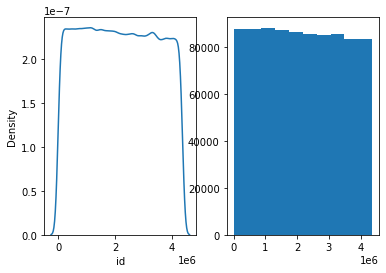

dtype: int64, max: 4362694, min: 2, shape unique: (806613,)
unique [  2   4  15  16  29  30  31  36  37  39  45  48  49  52  62  64  68  70
 104 109]
buy_time


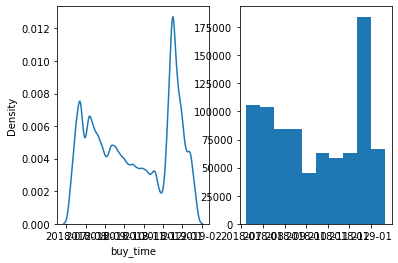

dtype: datetime64[ns], max: 2019-01-20T21:00:00.000000000, min: 2018-07-08T21:00:00.000000000, shape unique: (29,)
unique ['2018-07-08T21:00:00.000000000' '2018-07-15T21:00:00.000000000'
 '2018-07-22T21:00:00.000000000' '2018-07-29T21:00:00.000000000'
 '2018-08-05T21:00:00.000000000' '2018-08-12T21:00:00.000000000'
 '2018-08-19T21:00:00.000000000' '2018-08-26T21:00:00.000000000'
 '2018-09-02T21:00:00.000000000' '2018-09-09T21:00:00.000000000'
 '2018-09-16T21:00:00.000000000' '2018-09-23T21:00:00.000000000'
 '2018-09-30T21:00:00.000000000' '2018-10-07T21:00:00.000000000'
 '2018-10-14T21:00:00.000000000' '2018-10-21T21:00:00.000000000'
 '2018-10-28T21:00:00.000000000' '2018-11-04T21:00:00.000000000'
 '2018-11-11T21:00:00.000000000' '2018-11-18T21:00:00.000000000']
0


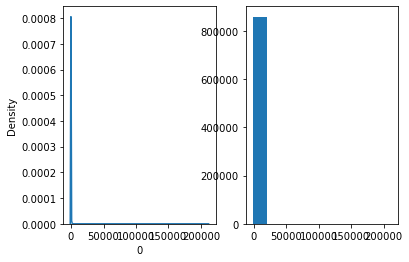

dtype: float64, max: 211730.72002922528, min: -1151.8899707746964, shape unique: (46780,)
unique [-1151.88997077 -1081.91997077  -916.44997077  -862.24997077
  -781.20997077  -719.16997077  -710.78997077  -696.44997077
  -693.23997077  -651.44997077  -650.01997077  -647.63997077
  -641.98997077  -630.69997077  -630.12997077  -613.73997077
  -610.91997077  -610.43997077  -604.95997077  -599.65997077]
1


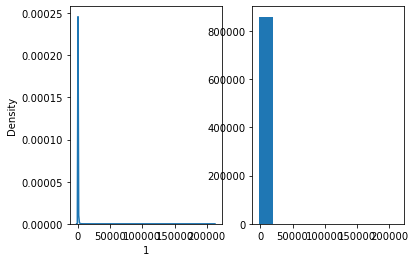

dtype: float64, max: 212606.13088788147, min: -1594.1191121185284, shape unique: (114013,)
unique [-1594.11911212 -1447.96911212 -1420.89911212 -1353.93911212
 -1248.84911212 -1244.35911212 -1112.62911212 -1093.59911212
 -1063.60911212 -1031.91911212  -892.96911212  -797.87911212
  -789.53911212  -776.40911212  -763.55911212  -719.56911212
  -710.72911212  -710.71911212  -706.89911212  -703.93911212]
2


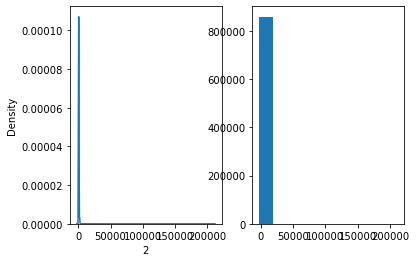

dtype: float64, max: 211716.77921404145, min: -2651.840785958558, shape unique: (57196,)
unique [-2651.84078596 -1212.43078596 -1165.83078596 -1070.57078596
 -1023.84078596  -930.39078596  -876.19078596  -822.18078596
  -808.00078596  -767.69078596  -725.82078596  -701.77078596
  -675.14078596  -661.58078596  -655.93078596  -652.11078596
  -651.69078596  -647.59078596  -647.46078596  -644.07078596]
3


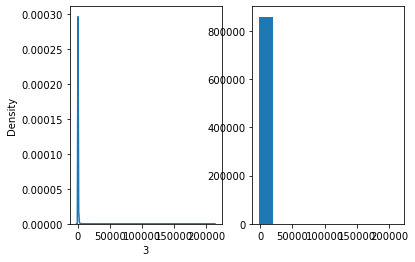

dtype: float64, max: 213357.74320175964, min: -1634.4367982403655, shape unique: (134056,)
unique [-1634.43679824 -1488.71679824 -1456.55679824 -1275.76679824
 -1271.77679824 -1250.60679824 -1135.57679824 -1107.73679824
 -1059.10679824  -984.33679824  -882.01679824  -842.14679824
  -842.00679824  -829.42679824  -816.74679824  -816.16679824
  -759.09679824  -756.54679824  -754.01679824  -752.31679824]
4


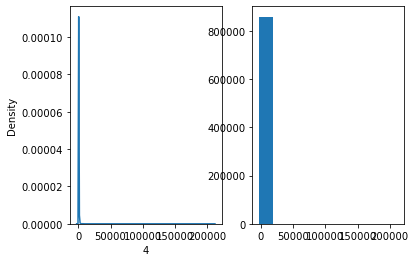

dtype: float64, max: 212095.26175370655, min: -2657.25824629343, shape unique: (59625,)
unique [-2657.25824629 -1217.84824629 -1171.24824629 -1075.98824629
 -1029.25824629  -927.33824629  -881.60824629  -827.59824629
  -813.41824629  -773.10824629  -731.23824629  -707.18824629
  -666.99824629  -661.34824629  -657.52824629  -657.10824629
  -653.00824629  -652.87824629  -649.48824629  -648.77824629]
5


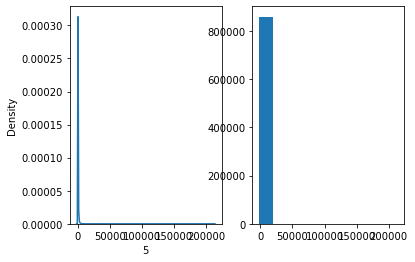

dtype: float64, max: 213720.5482104266, min: -1655.5417895733835, shape unique: (139557,)
unique [-1655.54178957 -1501.35178957 -1477.66178957 -1296.87178957
 -1292.88178957 -1271.71178957 -1156.68178957 -1128.84178957
 -1080.21178957 -1033.35178957 -1005.44178957  -903.12178957
  -863.25178957  -850.41178957  -837.85178957  -837.27178957
  -829.34178957  -777.65178957  -775.12178957  -717.05178957]
6


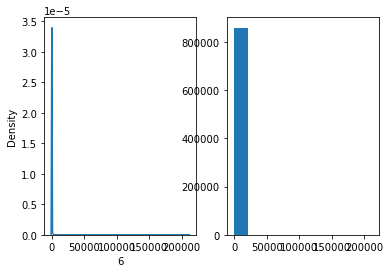

dtype: float64, max: 211811.43381996738, min: -541.5061800325669, shape unique: (10179,)
unique [-541.50618003 -455.91618003 -399.02618003 -329.64618003 -269.47618003
 -261.84618003 -172.85618003 -138.12618003 -122.88618003 -122.87618003
 -122.86618003 -116.94618003 -114.48618003 -111.01618003 -104.21618003
 -101.08618003  -99.13618003  -97.45618003  -97.44618003  -93.21618003]
7


KeyboardInterrupt: 

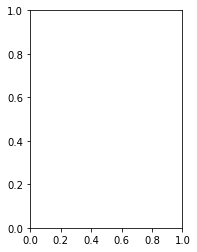

In [58]:
train_info = GetDataInfo(train)

In [20]:
train['buy_time'].max()

Timestamp('2019-01-20 21:00:00')

In [21]:
train['buy_time'].min()

Timestamp('2018-07-08 21:00:00')

In [22]:
train.columns = [col.lower() for col in train.columns]
test.columns = [col.lower() for col in test.columns]

In [23]:
import random
def SplitDataframe(df, procent):
    neg = set(df[['target', 'id']].loc[df['target'] == 0]['id'].values)
    pos = set(df[['target', 'id']].loc[df['target'] != 0]['id'].values)
    pos_idx1 = set(random.sample(pos, int(len(pos) * procent)))
    neg_idx1 = set(random.sample(neg, int(len(neg) * procent)))
    pos_idx2 = pos - pos_idx1
    neg_idx2 = neg - neg_idx1
    
    tr = df.loc[(df['id'].isin(pos_idx1)) | (df['id'].isin(neg_idx1))]
    ts = df.loc[(df['id'].isin(pos_idx2)) | (df['id'].isin(neg_idx2))]
    
    return tr, ts

In [24]:
X_train, X_test = SplitDataframe(train, 0.30)

In [25]:
#test_size_weeks = 4
#date = train['buy_time'].max() - dt.timedelta(weeks = test_size_weeks)
#X_train = train[train['buy_time'] < date]
#X_test = train[train['buy_time'] >= date]

#print(len(X_train))
#print(len(X_test))
#X_train.head(2)

In [26]:
X_train = X_train.drop_duplicates(subset=['id'], keep=False)
X_test = X_test.drop_duplicates(subset=['id'], keep=False)

In [27]:
data_prelim = X_train.copy()

X_train = data_prelim.drop('target', axis=1)
y_train = data_prelim['target']

data_prelim = X_test.copy()

X_test = data_prelim.drop('target', axis=1)
y_test = data_prelim['target']

In [28]:
%%time
from sklearn.model_selection import train_test_split

# Зафиксируем значение random_state для воспроизводимости результатов.
RANDOM_STATE = 888
X = train.drop('target', axis=1)
y = train['target']

Wall time: 466 ms


In [29]:
#%%time
#print("Train")
#print(y_train.value_counts() / train_idx.shape[0])
#print()
#print("Test")
#print(y_test.value_counts() / test_idx.shape[0])

<h2>Классификация фичь</h2>

In [30]:
print("ID уникален? ", X_train.index.is_unique)
print("Есть ли дубли в строках?", X_train.duplicated().sum())
print("Сколько процент признаков могут принимать null-значениями? %d%%" % float((X_train.isnull().sum() > 0).sum()/X_train.shape[1]*100))

ID уникален?  False
Есть ли дубли в строках? 0
Сколько процент признаков могут принимать null-значениями? 0%


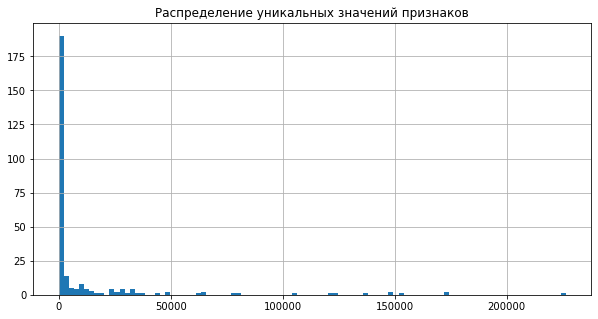

In [31]:
X_nunique = X_train.apply(lambda x: x.nunique(dropna=False))
plt.title("Распределение уникальных значений признаков");
X_nunique.hist(bins=100, figsize=(10, 5));

In [32]:
f_all = set(X_train.columns)
f_all.remove('buy_time')

In [33]:
f_const = set(X_nunique[X_nunique == 1].index.tolist())
len(f_const)

8

In [34]:
f_other = f_all - f_const

In [35]:
df = (X_train[list(f_other)].apply(lambda x: x.nunique(dropna=False)) == 2)
f_binary = set(df.loc[df == True].index)
len(f_binary)

23

In [36]:
f_other = f_all - (f_binary | f_const)
len(f_other)

233

In [37]:
f_categorical = set(X_nunique.loc[f_other][X_nunique.loc[f_other] <= 100].index.tolist())
f_numeric_extra = f_categorical

In [38]:
f_numeric = f_other - f_categorical
len(f_numeric)

171

In [39]:
f_dt = []
for col in X_train:
    if str(X_train[col].dtype) == 'datetime64[ns]':
        f_dt.append(col)
f_dt = set(f_dt)

In [40]:
f_numeric = f_numeric - f_dt 

In [41]:
assert(X_nunique.shape[0] == len(f_dt) + len(f_const) + len(f_binary) + len(f_numeric) + len(f_categorical))

In [42]:
print('f_all:', X_train.shape[1])
print()
print('f_const:', len(f_const))
print('f_binary:', len(f_binary))
print('f_categorical:', len(f_categorical))
print('f_numeric:', len(f_numeric))

f_ok = list(f_binary | f_categorical | f_numeric)
f_binary, f_categorical, f_numeric = list(f_binary), list(f_categorical), list(f_numeric)

f_all: 265

f_const: 8
f_binary: 23
f_categorical: 62
f_numeric: 171


<h2>Создание pipeline и моделирования базовой модели</h2>

In [43]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)

In [44]:
f_prep_pipeline = make_pipeline(
    ColumnSelector(columns=f_ok),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            ColumnSelector(f_numeric),
            SimpleImputer(strategy="mean"),
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown='ignore')
        )),
        ("boolean_features", make_pipeline(
            ColumnSelector(f_binary),
        ))
    ])
)

In [45]:
f_prep_pipeline.fit(X_train)

n_features = f_prep_pipeline.transform(X_test).shape[1]
n_features

2597

In [46]:
RANDOM_STATE=42

In [47]:
step_log_reg = ('log_reg', LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1))

In [48]:
step_imputer = ("imputer", SimpleImputer(strategy="mean"))

In [49]:
bl_estimator = Pipeline([
    step_imputer,
    step_log_reg
])

In [50]:
kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    print("%s: %s = %0.2f (+/- %0.2f)" % (model_name,
                                         scoring,
                                         cv_res['test_score'].mean(),
                                         cv_res['test_score'].std() * 2))
    

In [51]:
nul = 0
notnul = 0
for e in y_train:
    if e == 0.0:
        nul += 1
    else:
        notnul += 1
print(f'{nul} {notnul}')

216335 10041


In [52]:
X_train

,id,buy_time,0,1,2,3,4,5,6,7,...,hours,days,day_week,day_year,day_month,weeks_on,week_year,months,quartal,years
474,4293116,2019-01-20 21:00:00,-96.799971,49.460888,-108.240786,-0.646798,-113.658246,-21.75179,-16.08618,-65.076097,...,21,20,6,20,31,3,3,1,1,2019
400,4191291,2019-01-20 21:00:00,-96.799971,-402.249112,-110.740786,-413.196798,-116.158246,-434.30179,-16.08618,-59.146097,...,21,20,6,20,31,3,3,1,1,2019
163,3864763,2019-01-20 21:00:00,-96.799971,-6.179112,-90.740786,-14.616798,-94.658246,-34.22179,-16.08618,-65.076097,...,21,20,6,20,31,3,3,1,1,2019
1340,3548998,2019-01-20 21:00:00,-66.799971,-119.899112,-80.740786,-139.166798,-86.158246,-23.69179,-16.08618,-51.826097,...,21,20,6,20,31,3,3,1,1,2019
1697,1962191,2019-01-20 21:00:00,299.030029,-9.319112,285.089214,-51.926798,279.671754,-73.03179,-16.08618,-65.076097,...,21,20,6,20,31,3,3,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,4086694,2018-07-08 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-111.918246,-453.59179,-16.08618,-65.076097,...,21,8,6,189,31,27,27,7,3,2018
558,4362105,2018-07-08 21:00:00,-96.799971,-379.109112,-110.740786,-431.716798,-116.158246,-452.82179,-16.08618,-65.076097,...,21,8,6,189,31,27,27,7,3,2018
149,1322711,2018-07-08 21:00:00,-94.259971,-151.399112,-85.580786,-108.446798,-90.998246,-129.55179,-16.08618,-65.076097,...,21,8,6,189,31,27,27,7,3,2018
897,133352,2018-07-08 21:00:00,-84.189971,-350.309112,-86.270786,-351.216798,-91.688246,-372.32179,-14.22618,-55.946097,...,21,8,6,189,31,27,27,7,3,2018


In [53]:
run_cv(bl_estimator, kfold_cv, X_train.drop(columns=f_dt), y_train, model_name="Baseline");

Baseline: roc_auc = 0.51 (+/- 0.01)


In [54]:
bl_estimator.fit(X_train.drop(columns=f_dt), y_train)

bl_y_pred = bl_estimator.predict_proba(X_test.drop(columns=f_dt))[:,1]

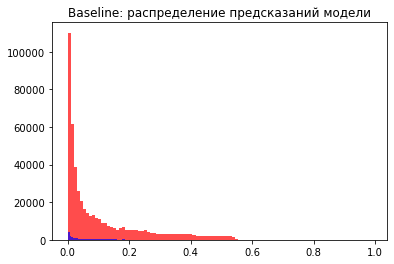

In [55]:
plt.title("Baseline: распределение предсказаний модели")
plt.hist(bl_y_pred[~y_test.astype(bool)], bins=100, color='r', alpha=0.7)
plt.hist(bl_y_pred[y_test.astype(bool)], bins=100, color='b', alpha=0.7)
plt.savefig('baseline.png')

In [56]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_test, bl_y_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_test, bl_y_pred)

Baseline: AUC_ROC = 0.506


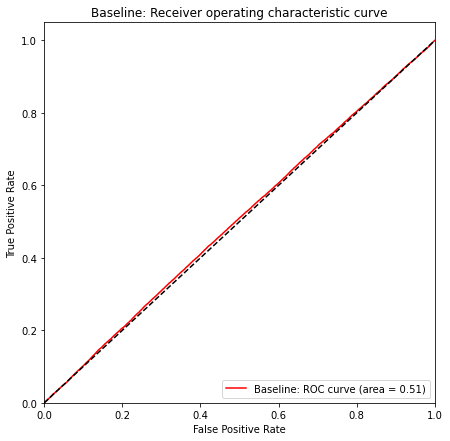

In [57]:
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "Baseline", color='r')
print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))
plt.savefig('baseline_roc_auc.png')

Baseline: AUC_PR = 0.046


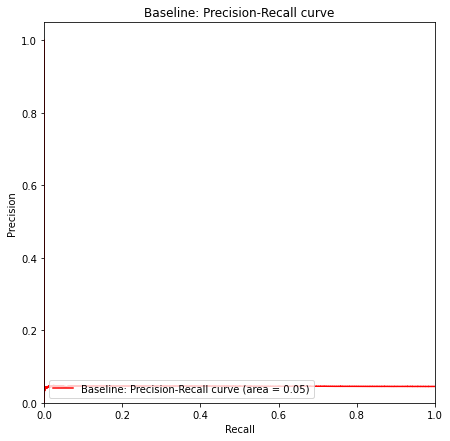

In [58]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.legend(loc="lower left")

plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "Baseline", color='r')
print("Baseline: AUC_PR = %.3f" % auc(recall, precision))

Максимальную точность при этом: 0.045
При каком пороге: 0.009


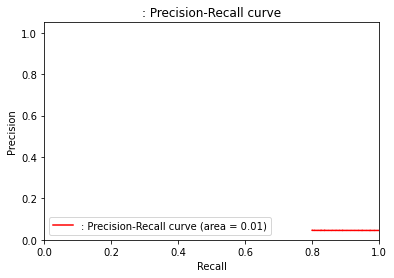

In [59]:
re80_mask = recall >= 0.8
pr_target_idx = np.arange(len(precision))[re80_mask]
pr_target = precision[re80_mask]

max_pr_idx = pr_target_idx[np.argmax(pr_target)]


print("Максимальную точность при этом: %.3f" % precision[max_pr_idx])
threshold80 = pr_thresholds[max_pr_idx]
print ("При каком пороге: %.3f" % threshold80)

plot_precision_recall_curve(recall[re80_mask], precision[re80_mask], color='r')

In [60]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          model_name="",
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest',  cmap=cmap)
    
    plt.grid(False)
    plt.title('%s: confusion matrix' % model_name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[496470   8181]
 [ 23481    390]]


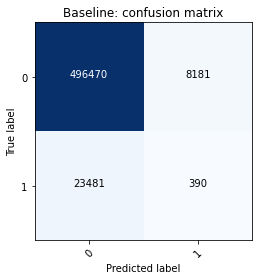

In [61]:
# TN                FP(Type II error)
# 
# FN(Type I error)  TP

cm = confusion_matrix(y_test, bl_y_pred > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline");

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, bl_y_pred > 0.5))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97    504651
         1.0       0.05      0.02      0.02     23871

    accuracy                           0.94    528522
   macro avg       0.50      0.50      0.50    528522
weighted avg       0.91      0.94      0.93    528522



In [63]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(fp + tp)
recall = tp/(fn + tp)

accuracy = (tp + tn)/(fp + fn + tp + tn)

micro_avg_pr    = (tn + tp) / (fn + tn + fp + tp)
macro_avg_pr    = (tn/(fn + tn) + tp/(fp + tp))/2

n_0 = (y_test == 0).sum()
n_1 = (y_test == 1).sum()
weighted_avg_pr = (n_0*tn/(fn + tn) + n_1*tp/(fp + tp))/(n_0 + n_1)

print("              accuracy = %.2f"   % float(accuracy))
print("           1 precision = %.2f"   % float(precision))
print("              1 recall = %.2f"   % float(recall))
print("   micro avg precision = %.2f "  % float(micro_avg_pr))
print("   macro avg precision = %.2f "  % float(macro_avg_pr))
print("weighted avg precision = %.2f "  % float(weighted_avg_pr))

              accuracy = 0.94
           1 precision = 0.05
              1 recall = 0.02
   micro avg precision = 0.94 
   macro avg precision = 0.50 
weighted avg precision = 0.91 


<h2>Модель данных</h2>

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

In [65]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)

In [66]:
cs_pipe = Pipeline([
    ('cs', ColumnSelector(columns=train.drop(columns=f_dt).columns[:5])),
])

In [67]:
# cs_pipe.fit(X_train)

cs_pipe.transform(X_test.drop(columns=f_dt)).head()

,id,0,1,2,3
983,3521152,-96.799971,-198.259112,-110.740786,-250.866798
937,189347,-96.799971,-314.719112,-110.740786,-352.326798
746,3406377,-95.299971,-162.009112,-100.910786,-206.286798
751,3413400,-96.799971,-391.929112,-110.740786,-444.536798
752,3414094,-75.799971,-249.899112,-89.740786,-285.836798


In [68]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [69]:
f_prep_pipeline = make_pipeline(
    ColumnSelector(columns=f_ok),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            ColumnSelector(f_numeric),
            SimpleImputer(strategy="mean"),
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown='ignore')
        )),
        ("boolean_features", make_pipeline(
            ColumnSelector(f_binary),
        ))
    ])
)

In [70]:
X_test.drop(columns=f_dt).shape[1]

264

<h2>Выбор лучшей модели</h2>

In [71]:
f_prep_pipeline.fit(X_train)

n_features = f_prep_pipeline.transform(X_test.drop(columns=f_dt)).shape[1]
n_features

2597

In [72]:
lg_pipe = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=RANDOM_STATE)
)

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
def run_grid_search(estimator, X, y, params_grid, cv, scoring='roc_auc'):
    gsc = GridSearchCV(estimator, params_grid, scoring=scoring, cv=cv, n_jobs=-1)

    gsc.fit(X, y)
    print("Best %s score: %.2f" % (scoring, gsc.best_score_))
    print()
    print("Best parameters set found on development set:")
    print()
    print(gsc.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(gsc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (gsc.cv_results_['mean_test_score'][i], gsc.cv_results_['std_test_score'][i] * 2, params))

    print()
    
    return gsc

In [75]:
[k for k in lg_pipe.get_params().keys() if 'imputer' in k]

['pipeline__featureunion__numeric_features__simpleimputer',
 'pipeline__featureunion__numeric_features__simpleimputer__add_indicator',
 'pipeline__featureunion__numeric_features__simpleimputer__copy',
 'pipeline__featureunion__numeric_features__simpleimputer__fill_value',
 'pipeline__featureunion__numeric_features__simpleimputer__missing_values',
 'pipeline__featureunion__numeric_features__simpleimputer__strategy',
 'pipeline__featureunion__numeric_features__simpleimputer__verbose',
 'pipeline__featureunion__categorical_features__simpleimputer',
 'pipeline__featureunion__categorical_features__simpleimputer__add_indicator',
 'pipeline__featureunion__categorical_features__simpleimputer__copy',
 'pipeline__featureunion__categorical_features__simpleimputer__fill_value',
 'pipeline__featureunion__categorical_features__simpleimputer__missing_values',
 'pipeline__featureunion__categorical_features__simpleimputer__strategy',
 'pipeline__featureunion__categorical_features__simpleimputer__verbos

In [78]:
param_grid = {
    "pipeline__featureunion__categorical_features__simpleimputer__strategy": ['constant'],
    "pipeline__featureunion__categorical_features__simpleimputer__fill_value": [-1],
    "logisticregression__C": [0.01]
}

lg_gsc = run_grid_search(lg_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

Best roc_auc score: 0.89

Best parameters set found on development set:

{'logisticregression__C': 0.01, 'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'constant'}

Grid scores on development set:

0.886 (+/-0.004) for {'logisticregression__C': 0.01, 'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'constant'}



In [79]:
param_grid = {
    "pipeline__featureunion__categorical_features__simpleimputer__strategy": ['constant'],
    "pipeline__featureunion__categorical_features__simpleimputer__fill_value": [-1],
    "logisticregression__C": [5.0]
}

lg_gsc = run_grid_search(lg_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

Best roc_auc score: 0.89

Best parameters set found on development set:

{'logisticregression__C': 5.0, 'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'constant'}

Grid scores on development set:

0.886 (+/-0.004) for {'logisticregression__C': 5.0, 'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'constant'}



In [76]:
param_grid = {
    "pipeline__featureunion__categorical_features__simpleimputer__strategy": ['most_frequent', 'constant'],
    "pipeline__featureunion__categorical_features__simpleimputer__fill_value": [-1],
}

lg_gsc = run_grid_search(lg_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

Best roc_auc score: 0.89

Best parameters set found on development set:

{'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'most_frequent'}

Grid scores on development set:

0.889 (+/-0.004) for {'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'most_frequent'}
0.889 (+/-0.004) for {'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'constant'}



In [77]:
lg_gsc.best_params_

{'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1,
 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'most_frequent'}

In [78]:
from sklearn.feature_selection import SelectFromModel

In [79]:
fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(random_state=RANDOM_STATE), threshold=1e-5),
)

In [80]:
f_prep_pipeline.fit(X_train.drop(columns=f_dt))
f_prep_pipeline.transform(X_test.drop(columns=f_dt)).shape

(528522, 2597)

In [81]:
fs_pipe.fit(X_train.drop(columns=f_dt), y_train)
fs_pipe.transform(X_test.drop(columns=f_dt)).shape

(528522, 2593)

In [82]:
lg_fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(random_state=RANDOM_STATE), threshold=1e-5),
    LogisticRegression(random_state=RANDOM_STATE)
)

In [ ]:
param_grid = [
    {"selectfrommodel__max_features": [None, 5], "selectfrommodel__threshold": [-np.inf]},
    {"selectfrommodel__threshold": [1e-5]},
]

lg_fs_gsc = run_grid_search(lg_fs_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

In [ ]:
param_grid = [
    {"selectfrommodel__max_features": [10, 50], "selectfrommodel__threshold": [-np.inf]},
    {"selectfrommodel__threshold": [1e-5]},
]

lg_fs_gsc = run_grid_search(lg_fs_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

In [83]:
param_grid = [
    {"selectfrommodel__max_features": [100, 150], "selectfrommodel__threshold": [-np.inf]},
    {"selectfrommodel__threshold": [1e-5]},
]

lg_fs_gsc = run_grid_search(lg_fs_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

Best roc_auc score: nan

Best parameters set found on development set:

{'selectfrommodel__max_features': 100, 'selectfrommodel__threshold': -inf}

Grid scores on development set:

nan (+/-nan) for {'selectfrommodel__max_features': 100, 'selectfrommodel__threshold': -inf}
nan (+/-nan) for {'selectfrommodel__max_features': 150, 'selectfrommodel__threshold': -inf}
nan (+/-nan) for {'selectfrommodel__threshold': 1e-05}



In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gb_fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(random_state=RANDOM_STATE), threshold=1e-5),
    GradientBoostingClassifier()
)

In [86]:
[k for k in gb_fs_pipe.get_params().keys() if 'grad' in k]

['gradientboostingclassifier',
 'gradientboostingclassifier__ccp_alpha',
 'gradientboostingclassifier__criterion',
 'gradientboostingclassifier__init',
 'gradientboostingclassifier__learning_rate',
 'gradientboostingclassifier__loss',
 'gradientboostingclassifier__max_depth',
 'gradientboostingclassifier__max_features',
 'gradientboostingclassifier__max_leaf_nodes',
 'gradientboostingclassifier__min_impurity_decrease',
 'gradientboostingclassifier__min_impurity_split',
 'gradientboostingclassifier__min_samples_leaf',
 'gradientboostingclassifier__min_samples_split',
 'gradientboostingclassifier__min_weight_fraction_leaf',
 'gradientboostingclassifier__n_estimators',
 'gradientboostingclassifier__n_iter_no_change',
 'gradientboostingclassifier__random_state',
 'gradientboostingclassifier__subsample',
 'gradientboostingclassifier__tol',
 'gradientboostingclassifier__validation_fraction',
 'gradientboostingclassifier__verbose',
 'gradientboostingclassifier__warm_start']

In [ ]:
param_grid = {
    "selectfrommodel__threshold": [1e-05],
    "gradientboostingclassifier__max_depth": [5],
    "gradientboostingclassifier__n_estimators": [10, 100]
}

gb_fs_gsc = run_grid_search(gb_fs_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

In [ ]:
param_grid = {
    "selectfrommodel__threshold": [1e-05],
    "gradientboostingclassifier__max_depth": [1],
    "gradientboostingclassifier__n_estimators": [10, 100]
}

gb_fs_gsc = run_grid_search(gb_fs_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

In [ ]:
param_grid = {
    "selectfrommodel__threshold": [-np.inf],
    "gradientboostingclassifier__max_depth": [5],
    "gradientboostingclassifier__n_estimators": [10, 100]
}

gb_fs_gsc = run_grid_search(gb_fs_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

In [87]:
param_grid = {
    "selectfrommodel__threshold": [-np.inf],
    "gradientboostingclassifier__max_depth": [1],
    "gradientboostingclassifier__n_estimators": [10, 100]
}

gb_fs_gsc = run_grid_search(gb_fs_pipe, X_train.drop(columns=f_dt), y_train, param_grid, kfold_cv)

Best roc_auc score: 0.89

Best parameters set found on development set:

{'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 10, 'selectfrommodel__threshold': -inf}

Grid scores on development set:

0.891 (+/-0.004) for {'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 10, 'selectfrommodel__threshold': -inf}
nan (+/-nan) for {'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 100, 'selectfrommodel__threshold': -inf}



In [88]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', learning_rate_init=0.1, alpha=0.1,
                    activation='tanh', random_state=RANDOM_STATE, max_iter=5,
                    hidden_layer_sizes=2, momentum=0)
hidden_size = 2
# set weights
mlp.coefs_ = [0] * 2
mlp.intercepts_ = [0] * 2
mlp.n_outputs_ = 1
mlp.coefs_[0] = np.array([[0.1, 0.2], [0.3, 0.1], [0.5, 0]])
mlp.coefs_[1] = np.array([[0.1], [0.2]])
mlp.intercepts_[0] = np.array([0.1, 0.1])
mlp.intercepts_[1] = np.array([1.0])
mlp._coef_grads = [] * 2
mlp._intercept_grads = [] * 2

# Initialize parameters
mlp.n_iter_ = 0
mlp.learning_rate_ = 0.1

# Compute the number of layers
mlp.n_layers_ = 3

# Pre-allocate gradient matrices
mlp._coef_grads = [0] * (mlp.n_layers_ - 1)
mlp._intercept_grads = [0] * (mlp.n_layers_ - 1)

mlp.out_activation_ = 'tanh'
mlp.t_ = 0
mlp.best_loss_ = np.inf
mlp.loss_curve_ = []
mlp._no_improvement_count = 0
mlp._intercept_velocity = [np.zeros_like(intercepts) for
                               intercepts in
                               mlp.intercepts_]
mlp._coef_velocity = [np.zeros_like(coefs) for coefs in
                          mlp.coefs_]

In [89]:
mlpc_pipe = make_pipeline(
    f_prep_pipeline,
    #mlp
    MLPClassifier(solver='lbfgs', hidden_layer_sizes=12,  random_state=RANDOM_STATE, early_stopping=True),
)

In [90]:
[k for k in mlpc_pipe.get_params().keys() if 'model' in k]

[]

In [91]:
mlpc_pipe.fit(X_train.drop(columns=f_dt), y_train)
mlpc_pred = mlpc_pipe.predict_proba(X_test.drop(columns=f_dt))

In [92]:
mlpc_pred[:, 1]

array([0.04438102, 0.04438102, 0.04438102, ..., 0.04438102, 0.04438102,
       0.04438102])

In [93]:
print(classification_report(y_test, mlpc_pred[:,1] > 0.5))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98    504651
         1.0       0.11      0.00      0.00     23871

    accuracy                           0.95    528522
   macro avg       0.53      0.50      0.49    528522
weighted avg       0.92      0.95      0.93    528522



In [94]:
from catboost import CatBoostClassifier


cb_cl_pipe = make_pipeline(
    f_prep_pipeline,
    CatBoostClassifier(iterations=300,
                       depth=11,
                       eval_metric='AUC',
                       learning_rate=0.05,
                       verbose=True,
                       random_state=RANDOM_STATE),
)

In [95]:
cb_cl_pipe.fit(X_train.drop(columns=f_dt), y_train)
cb_cl_pred = cb_cl_pipe.predict_proba(X_test.drop(columns=f_dt))

0:	total: 1.09s	remaining: 5m 26s
1:	total: 2s	remaining: 4m 57s
2:	total: 2.93s	remaining: 4m 49s
3:	total: 3.85s	remaining: 4m 44s
4:	total: 4.81s	remaining: 4m 43s
5:	total: 5.75s	remaining: 4m 41s
6:	total: 6.67s	remaining: 4m 39s
7:	total: 7.63s	remaining: 4m 38s
8:	total: 8.57s	remaining: 4m 37s
9:	total: 9.62s	remaining: 4m 38s
10:	total: 10.6s	remaining: 4m 37s
11:	total: 11.5s	remaining: 4m 36s
12:	total: 12.5s	remaining: 4m 35s
13:	total: 13.4s	remaining: 4m 34s
14:	total: 14.4s	remaining: 4m 33s
15:	total: 15.3s	remaining: 4m 31s
16:	total: 16.3s	remaining: 4m 31s
17:	total: 16.9s	remaining: 4m 25s
18:	total: 17.9s	remaining: 4m 24s
19:	total: 18.9s	remaining: 4m 24s
20:	total: 19.9s	remaining: 4m 23s
21:	total: 20.8s	remaining: 4m 23s
22:	total: 21.8s	remaining: 4m 22s
23:	total: 22.8s	remaining: 4m 21s
24:	total: 23.8s	remaining: 4m 22s
25:	total: 24.9s	remaining: 4m 22s
26:	total: 26s	remaining: 4m 22s
27:	total: 27.1s	remaining: 4m 22s
28:	total: 28.1s	remaining: 4m 22s


229:	total: 3m 55s	remaining: 1m 11s
230:	total: 3m 55s	remaining: 1m 10s
231:	total: 3m 56s	remaining: 1m 9s
232:	total: 3m 57s	remaining: 1m 8s
233:	total: 3m 58s	remaining: 1m 7s
234:	total: 4m	remaining: 1m 6s
235:	total: 4m 1s	remaining: 1m 5s
236:	total: 4m 2s	remaining: 1m 4s
237:	total: 4m 3s	remaining: 1m 3s
238:	total: 4m 4s	remaining: 1m 2s
239:	total: 4m 5s	remaining: 1m 1s
240:	total: 4m 6s	remaining: 1m
241:	total: 4m 7s	remaining: 59.2s
242:	total: 4m 7s	remaining: 58.2s
243:	total: 4m 8s	remaining: 57.1s
244:	total: 4m 9s	remaining: 56.1s
245:	total: 4m 10s	remaining: 55.1s
246:	total: 4m 11s	remaining: 54s
247:	total: 4m 12s	remaining: 53s
248:	total: 4m 13s	remaining: 52s
249:	total: 4m 14s	remaining: 51s
250:	total: 4m 15s	remaining: 49.9s
251:	total: 4m 16s	remaining: 48.9s
252:	total: 4m 17s	remaining: 47.9s
253:	total: 4m 18s	remaining: 46.8s
254:	total: 4m 19s	remaining: 45.8s
255:	total: 4m 20s	remaining: 44.8s
256:	total: 4m 21s	remaining: 43.8s
257:	total: 4m 

In [96]:
cb_cl_pred[:,1]

array([0.00429731, 0.0088051 , 0.00491497, ..., 0.00707481, 0.00583847,
       0.00703827])

In [97]:
print(classification_report(y_test, cb_cl_pred[:,1] > 0.5))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98    504651
         1.0       0.38      0.00      0.00     23871

    accuracy                           0.95    528522
   macro avg       0.67      0.50      0.49    528522
weighted avg       0.93      0.95      0.93    528522



In [98]:
[k for k in cb_cl_pipe.get_params().keys() if 'model' in k]

[]

In [99]:
lg_fs_pipe_final = lg_fs_gsc.best_estimator_
lg_fs_pipe_final.fit(X_train.drop(columns=f_dt), y_train)
lg_fs_pred = lg_fs_pipe_final.predict_proba(X_test.drop(columns=f_dt))[:,1]

In [100]:
print(classification_report(y_test, lg_fs_pred > 0.5))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98    504651
         1.0       0.27      0.00      0.00     23871

    accuracy                           0.95    528522
   macro avg       0.61      0.50      0.49    528522
weighted avg       0.92      0.95      0.93    528522



In [101]:
gb_fs_pipe_final = gb_fs_gsc.best_estimator_
gb_fs_pipe_final.fit(X_train, y_train)
gb_fs_pred = gb_fs_pipe_final.predict_proba(X_test)[:,1]

In [102]:
print(classification_report(y_test, gb_fs_pred > 0.5))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98    504651
         1.0       0.00      0.00      0.00     23871

    accuracy                           0.95    528522
   macro avg       0.48      0.50      0.49    528522
weighted avg       0.91      0.95      0.93    528522



In [103]:
models = [ 
    ["Baseline", y_test, bl_y_pred, bl_estimator, 'red'],
    ["lg_fs_pred", y_test, lg_fs_pred, lg_fs_pipe_final, 'green'],
    ["gb_fs_pred", y_test, gb_fs_pred, gb_fs_pipe_final, 'purple'],
    ["cb_cl_pred", y_test, cb_cl_pred[:, 1], cb_cl_pipe, 'blue'],
    ["mlpc_pred", y_test, mlpc_pred[:, 1], mlpc_pipe, 'black'],
]

Baseline: AUC_PR = 0.046
Baseline: AUC_ROC = 0.506
lg_fs_pred: AUC_PR = 0.310
lg_fs_pred: AUC_ROC = 0.892
gb_fs_pred: AUC_PR = 0.488
gb_fs_pred: AUC_ROC = 0.889
cb_cl_pred: AUC_PR = 0.311
cb_cl_pred: AUC_ROC = 0.890
mlpc_pred: AUC_PR = 0.054
mlpc_pred: AUC_ROC = 0.500


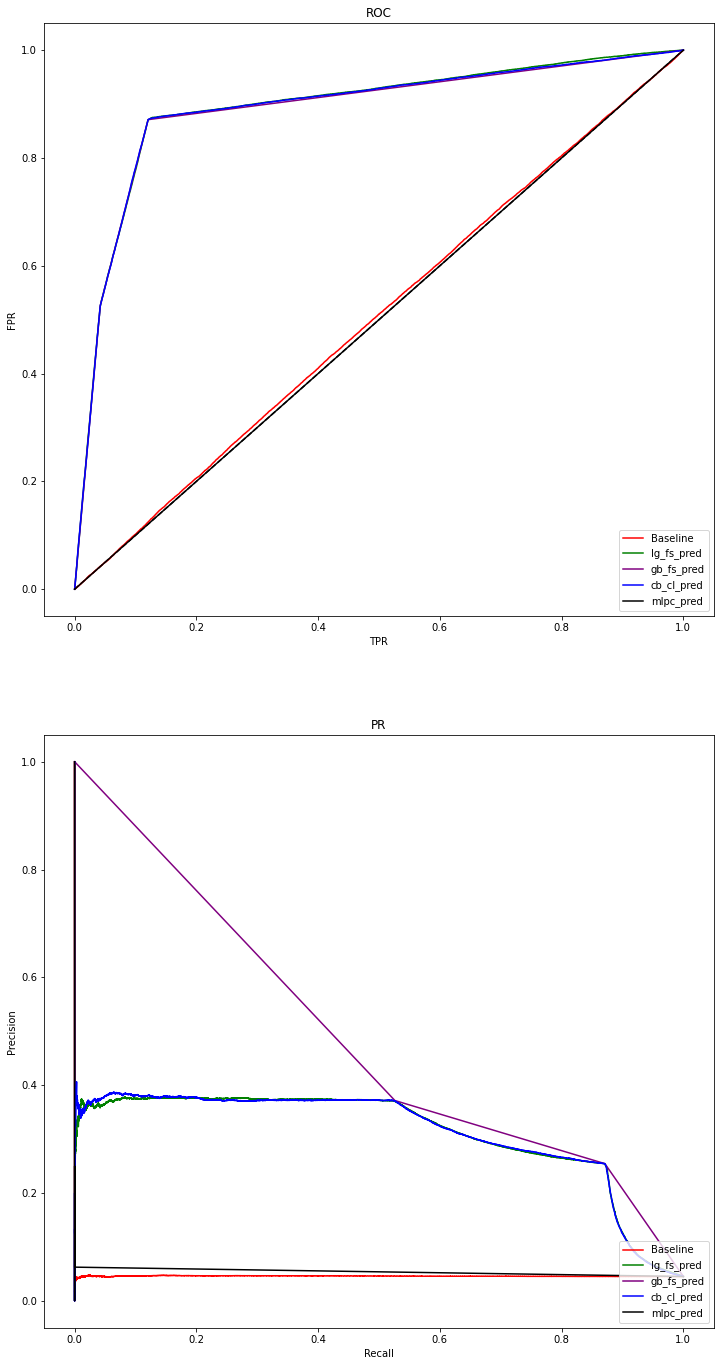

In [104]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

f.set_figheight(24)
f.set_figwidth(12)

ax1 = plt.subplot(211)
ax1.set_title('ROC')
ax1.set_xlabel('TPR')
ax1.set_ylabel('FPR')


ax2 = plt.subplot(212)
ax2.set_title('PR')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')

ax1.plot([0, 1], [0, 1], 'k--')
for m in models:
    fpr, tpr, roc_thresholds = roc_curve(m[1], m[2])
    precision, recall, pr_thresholds = precision_recall_curve(m[1], m[2])
    ax1.plot(fpr, tpr, label=m[0], color=m[4])
    ax2.plot(recall, precision, label=m[0], color=m[4])
    print(f"{m[0]}: AUC_PR = %.3f" % auc(recall, precision))
    print(f"{m[0]}: AUC_ROC = %.3f" % auc(fpr, tpr))
    ax1.legend(loc="lower right")
    ax2.legend(loc="lower right")
plt.savefig('allmodel_roc_auc.png')

Baseline
macro avg precision = 0.49 
Confusion matrix, without normalization
[[443978  60673]
 [ 20911   2960]]

lg_fs_pred
macro avg precision = 0.70 
Confusion matrix, without normalization
[[483865  20786]
 [ 11590  12281]]

gb_fs_pred
macro avg precision = 0.49 
Confusion matrix, without normalization
[[504651      0]
 [ 23871      0]]

cb_cl_pred
macro avg precision = 0.70 
Confusion matrix, without normalization
[[484238  20413]
 [ 11796  12075]]

mlpc_pred
macro avg precision = 0.49 
Confusion matrix, without normalization
[[504643      8]
 [ 23870      1]]



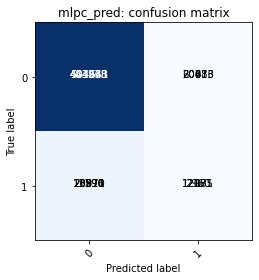

In [105]:
from sklearn.metrics import f1_score

for m in models:
    print(m[0])
    f1_ = f1_score(m[1], m[2] > 0.3, average='macro')
    print("macro avg precision = %.2f "  % float(f1_))
    cm = confusion_matrix(y_test, m[2] > 0.3)
    plot_confusion_matrix(cm, classes=["0", "1"], model_name=m[0])
    print()

In [108]:
#cb_cl_pred.plot_tree(tree_idx=0)

In [109]:
import pickle

In [110]:
gb_fs_pipe_final.predict(test)

array([0., 0., 0., ..., 0., 0., 0.])

In [128]:
class Model:
    def init(self, model):
        self.model = model
        
    def fit(self):
        self.model = pickle.load(open('fin_model.pkl', 'rb'))
        pred = (self.model.predict_proba(test.drop(columns=['buy_time']))[:, 1] > 0.3).astype('int32')        
        test['target'] = pred
        print(test.columns)
        test[['id', 'buy_time', 'vas_id', 'target']].to_csv("answers_test.csv")
        
    def save(self):
        pickle.dump(self.model, open('fin_model.pkl', 'wb'))

In [129]:
md = Model()
md.init(cb_cl_pipe)
md.save()

<h2>Предсказание</h2>

In [130]:
md.fit()

Index(['id', 'buy_time', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       'days', 'day_week', 'day_year', 'day_month', 'weeks_on', 'week_year',
       'months', 'quartal', 'years', 'target'],
      dtype='object', length=266)
